In [1]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#dataframe consisting of abusive/slang words
df_bad = pd.read_csv("bad_many.csv")

In [3]:
#prinitng first 10 records of the bad dataset
df_bad.head(20)

,word
0,5h1t
1,5hit
2,a55
3,anal
4,anus
5,ar5e
6,arrse
7,arse
8,ass
9,ass-fucker


In [4]:
#twitter dataframe
df_tweet = pd.read_csv("tweet.csv")

In [32]:
#label with values 0 indicate non-abusive words and 1 contains slang words
df_tweet

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation
...,...,...,...
31957,31958,0,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,sikh temple vandalised in in calgary wso cond...


In [5]:
#to check whether dataframe consists of null values
df_bad.isnull().any()

word    False
dtype: bool

In [6]:
df_tweet.isnull().any()

id       False
label    False
tweet    False
dtype: bool

In [7]:
#filtering positive tweets(without abusive words) i.e. tweets with label 0
df_tweet[df_tweet['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [8]:
#filtering negative  tweets(with abusive words) i.e. tweets with label 0
df_tweet[df_tweet['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


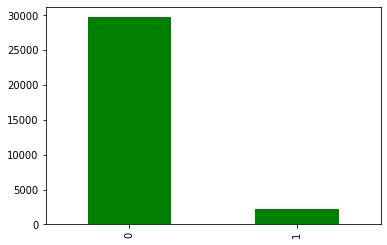

In [9]:
#plotting frequency of data with abusive and non abusive words
df_tweet['label'].value_counts().plot.bar(color = 'green', figsize = (6, 4))

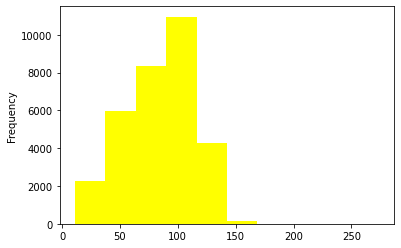

In [10]:
#plotting length of the comments by .len() function
length_train = df_tweet['tweet'].str.len().plot.hist(color = 'yellow', figsize = (6, 4))

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

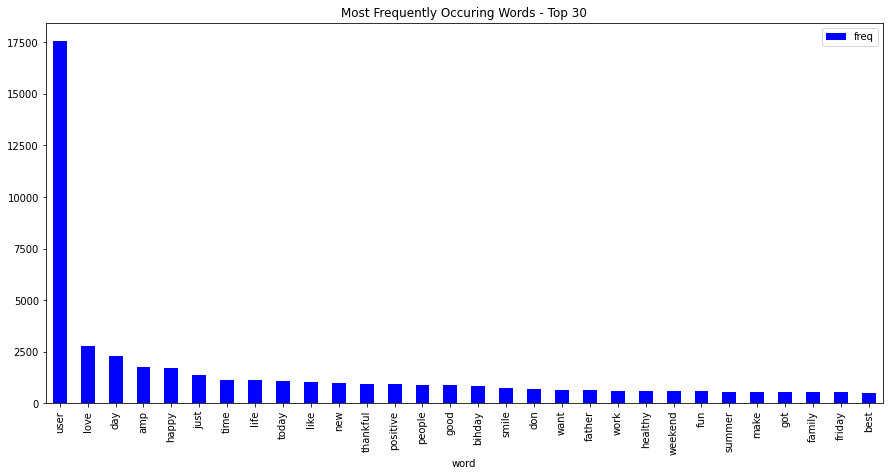

In [11]:
#calculating and plotting the top 30 frequently occuring words

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df_tweet.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

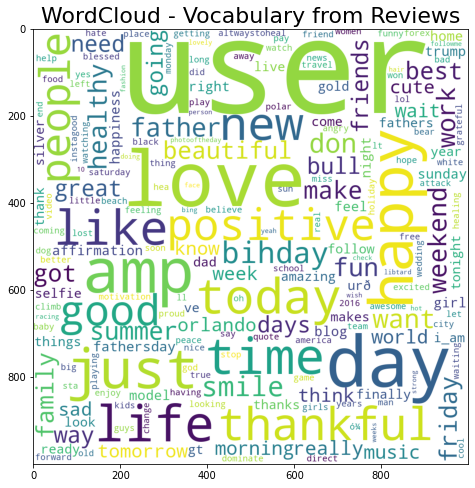

In [12]:
#using wordcloud library to visualize most used words according to the kength of the text in the plot. for eg. "user"
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

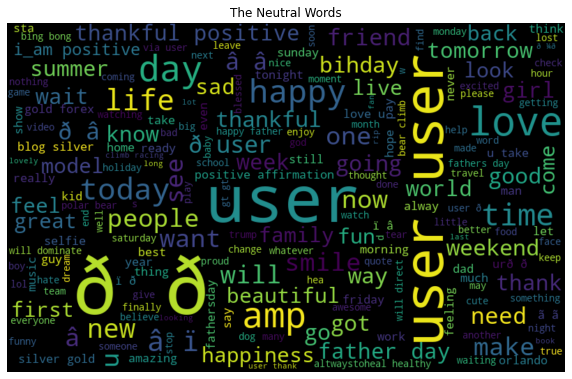

In [13]:
#by filtering the label by value 0 which contains non abusive words and plotting the frequency using wordcloud library
normal_words =' '.join([text for text in df_tweet['tweet'][df_tweet['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

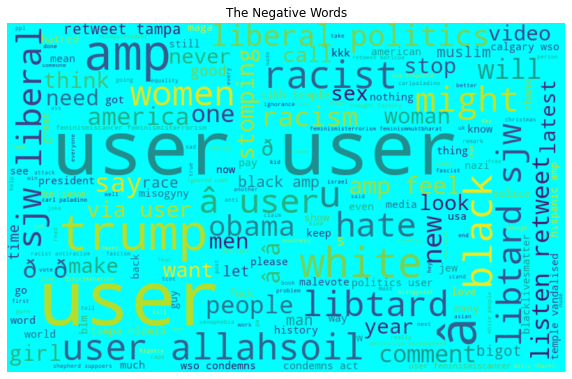

In [14]:
#by filtering the label by value 1 which contains abusive words and plotting the frequency using wordcloud library
negative_words =' '.join([text for text in df_tweet['tweet'][df_tweet['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [15]:
#function to store hashtags occuring in the tweets.
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [16]:
import re

In [17]:
# extracting hashtags from non abusive/racist/sexist tweets

HT_regular = hashtag_extract(df_tweet['tweet'][df_tweet['label'] == 0])

# extracting hashtags from abusive/racist/sexist tweets
HT_negative = hashtag_extract(df_tweet['tweet'][df_tweet['label'] == 1])

HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [18]:
import nltk

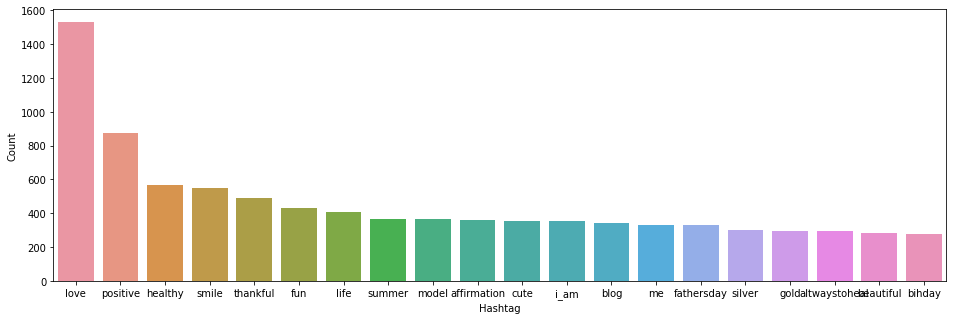

In [19]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags in the non-abusive tweets  
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

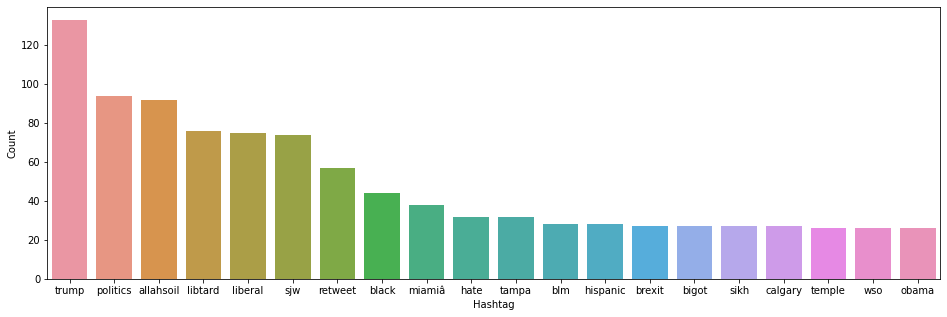

In [20]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags in the abusive tweets   
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [21]:
#tweets contains special characters like @,! to clean the tweets in the proper format
import re
def  clean_text(df_tweet, text_field):
    df_tweet[text_field] = df_tweet[text_field].str.lower()
    df_tweet[text_field] = df_tweet[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df_tweet

In [22]:
df_tweet=clean_text(df_tweet,"tweet")

In [23]:
df_tweet

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation
...,...,...,...
31957,31958,0,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,sikh temple vandalised in in calgary wso cond...


In [24]:
#filering tweets with bad words
bad=df_tweet[df_tweet['label'] == 1]

In [25]:
bad

,id,label,tweet
13,14,1,cnn calls michigan middle school build the wa...
14,15,1,no comment in australia opkillingbay seashe...
17,18,1,retweet if you agree
23,24,1,lumpy says i am a prove it lumpy
34,35,1,its unbelievable that in the 21st century wed ...
...,...,...,...
31934,31935,1,lady banned from kentucky mall jcpenny kentu...
31946,31947,1,omfg im offended im a mailbox and im proud m...
31947,31948,1,you dont have the balls to hashtag me as a ...
31948,31949,1,makes you ask yourself who am i then am i any...


In [26]:
#converting the tweets containing slang words from dataframe to list
bad_data = bad["tweet"].values.tolist()

In [27]:
#converting word csv into list
bad_words = df_bad['word'].tolist()

In [28]:
#calculating profanity score. formula= (number of abusive words/ total length of tweet) which gives the values 
#ranging from 0 to 1 where 0 inidcates no slang and 1 indicates highest slang

#for eg. you are a bull shit. 2/5 will give the profanity score as 0.4 and likewise.
l=[]
for i in bad_data:
    profinaty=0
    temp=i.split(" ")
    for j in temp:
        if j in bad_words:
            profinaty+=1
    degree=(profinaty/len(temp))
    round_degree=round(degree,2)
    l.append(round_degree)


In [30]:
#the profanity score of each sentence is stored in the list 'l' and this column is appended to the dataframe
bad.insert(3,"degree of profanity",l,True)

In [31]:
#the dataframe is converted to csv
bad.to_csv('profanity_score.csv')